# Merkle Datathon - Parte 1

## 1. ¿Observáis alguna diferencia en el comportamiento de la audiencia en base a la edad y el sexo?

In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_excel("data/datathon2023_1/pred_AudienciasAsturias.xlsx")

print(df.head())

   Unnamed: 0     Fechas  MAud_TTV_4plus  Cuota_TTV_4plus  AM_TTV_4plus   
0         367 2021-01-01      314.199132              100    216.448255  \
1         368 2021-01-02      251.052030              100    172.947650   
2         369 2021-01-03      285.155361              100    196.440777   
3         370 2021-01-04      263.280935              100    181.370528   
4         371 2021-01-05      262.660902              100    180.943953   

   MAA_TTV_4plus  MAud_La1_4plus  Cuota_La1_4plus  AM_La1_4plus   
0     713.184330       43.241930        13.762587     29.788880  \
1     712.983201       21.800068         8.683486     15.017885   
2     707.638598       30.602084        10.731723     21.081480   
3     698.234630       25.268668         9.597607     17.407230   
4     723.033132       30.034901        11.434858     20.690684   

   MAA_La1_4plus  ...  AM_T5_65plus  MAA_T5_65plus  MAud_Sexta_65plus   
0     474.786400  ...      8.635361     129.407521          13.248677  \


In [68]:
# Filter out the columns with 'AM' and '_HOM' and '_MUJ' suffixes
male_columns = [col for col in df.columns if col.startswith('AM') and col.endswith('_HOM') and not col.startswith('AM_TTV')]
female_columns = [col for col in df.columns if col.startswith('AM') and col.endswith('_MUJ') and not col.startswith('AM_TTV')]

# Calculate the average audience for each TV and gender
male_data = df[male_columns].mean().rename(lambda x: x[3:-4], axis='index')
female_data = df[female_columns].mean().rename(lambda x: x[3:-4], axis='index')

# Create a new DataFrame for the TV-gender comparison
tv_gender_df = pd.DataFrame({'Male': male_data, 'Female': female_data})


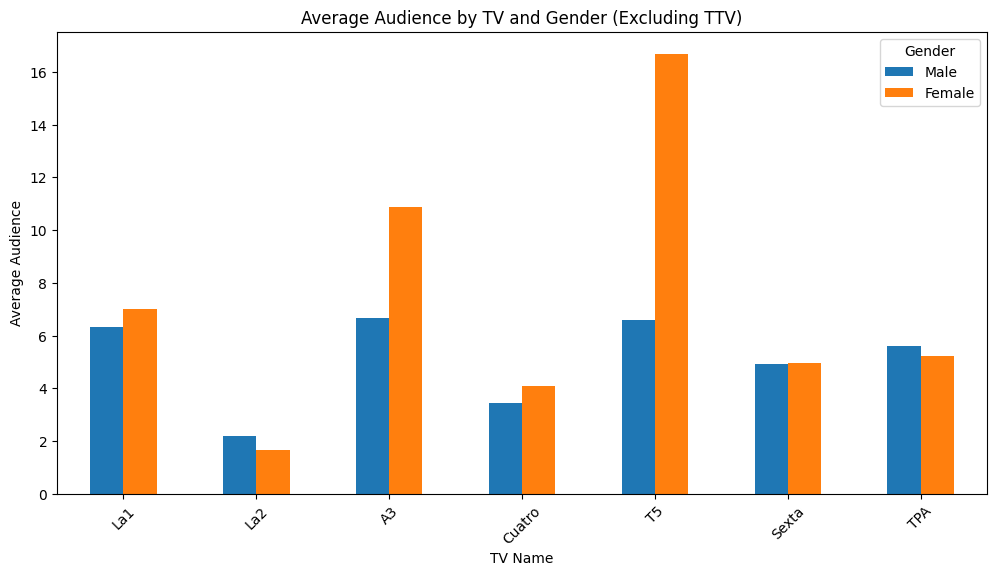

In [69]:
# Bar plot comparing average audience for each TV
tv_gender_df.plot(kind='bar', figsize=(12, 6))

plt.title('Average Audience by TV and Gender (Excluding TTV)')
plt.xlabel('TV Name')
plt.ylabel('Average Audience')
plt.xticks(rotation=45)
plt.legend(title='Gender')

plt.show()


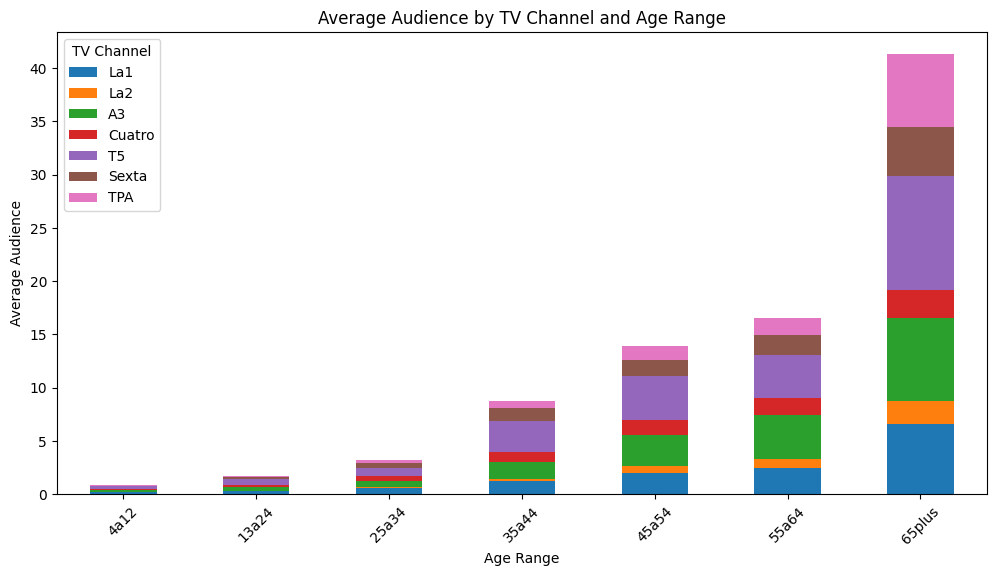

In [70]:
# List the age ranges
age_ranges = ['4a12', '13a24', '25a34', '35a44', '45a54', '55a64', '65plus']

# Create a new DataFrame to store the average audience by TV channel and age range
age_range_df = pd.DataFrame(columns=age_ranges)

# Loop through the age ranges and calculate the average audience for each TV channel
for age_range in age_ranges:
    age_columns = [col for col in df.columns if col.startswith('AM') and col.endswith(age_range)  and not col.startswith('AM_TTV')]
    age_data = df[age_columns].mean().rename(lambda x: x[3:-len(age_range)-1], axis='index')
    age_range_df[age_range] = age_data

# Transpose the DataFrame to have the age ranges as rows and TV channels as columns
age_range_df = age_range_df.transpose()

# Stacked bar plot comparing average audience for different age ranges
age_range_df.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Average Audience by TV Channel and Age Range')
plt.xlabel('Age Range')
plt.ylabel('Average Audience')
plt.xticks(rotation=45)
plt.legend(title='TV Channel')

plt.show()


## 2. ¿Qué clima es más rentable para la televisión?

In [71]:
df_clima = pd.read_csv("data/datathon2023_1/pred_climaAsturias.csv", na_values='NA')

df_clima['fecha'] = pd.to_datetime(df_clima['fecha'], format='%d/%m/%Y')
df_clima.set_index('fecha', inplace=True)
df_clima['precipitacion'] = pd.to_numeric(df_clima['precipitacion'], errors='coerce')

df_clima['temp_media'] = pd.to_numeric(df_clima['temp_media'], errors='coerce')
df_clima['sol'] = pd.to_numeric(df_clima['sol'], errors='coerce')

df_clima.head(20)

,estacion_metereologica,temp_media,precipitacion,sol
fecha,,,,
2021-01-01,ASTURIAS AEROPUERTO,6.0,8.0,NaN
2021-01-02,ASTURIAS AEROPUERTO,4.6,16.0,NaN
2021-01-03,ASTURIAS AEROPUERTO,5.3,41.0,NaN
2021-01-04,ASTURIAS AEROPUERTO,3.6,11.0,NaN
2021-01-05,ASTURIAS AEROPUERTO,4.8,8.0,NaN
2021-01-06,ASTURIAS AEROPUERTO,5.3,0.0,NaN
2021-01-07,ASTURIAS AEROPUERTO,4.4,0.0,8.5
2021-01-08,ASTURIAS AEROPUERTO,3.5,0.0,NaN
2021-01-09,ASTURIAS AEROPUERTO,3.3,10.0,NaN


In [72]:
df_audiencia = pd.read_excel("data/datathon2023_1/pred_AudienciasAsturias.xlsx")

df_audiencia['Fechas'] = pd.to_datetime(df_audiencia['Fechas'], format='%Y/%m/%d')
df_audiencia.set_index('Fechas', inplace=True)

df_audiencia.head()

,Unnamed: 0,MAud_TTV_4plus,Cuota_TTV_4plus,AM_TTV_4plus,MAA_TTV_4plus,MAud_La1_4plus,Cuota_La1_4plus,AM_La1_4plus,MAA_La1_4plus,MAud_La2_4plus,...,AM_T5_65plus,MAA_T5_65plus,MAud_Sexta_65plus,Cuota_Sexta_65plus,AM_Sexta_65plus,MAA_Sexta_65plus,MAud_TPA_65plus,Cuota_TPA_65plus,AM_TPA_65plus,MAA_TPA_65plus
Fechas,,,,,,,,,,,,,,,,,,,,,
2021-01-01,367,314.199132,100,216.448255,713.184330,43.241930,13.762587,29.788880,474.786400,11.003928,...,8.635361,129.407521,13.248677,3.353554,2.437988,110.958810,51.688607,13.083610,9.511606,135.593761
2021-01-02,368,251.052030,100,172.947650,712.983201,21.800068,8.683486,15.017885,333.620461,6.748446,...,12.466821,118.499660,15.180268,4.605338,2.793469,88.627490,44.649534,13.545625,8.216396,118.330800
2021-01-03,369,285.155361,100,196.440777,707.638598,30.602084,10.731723,21.081480,398.233909,10.283538,...,10.595912,125.733249,10.558934,2.860100,1.943046,96.754769,48.152976,13.043205,8.861070,131.313359
2021-01-04,370,263.280935,100,181.370528,698.234630,25.268668,9.597607,17.407230,345.835779,9.236051,...,13.242719,123.171739,26.636063,6.493261,4.901539,112.811360,51.839354,12.637244,9.539421,147.515790
2021-01-05,371,262.660902,100,180.943953,723.033132,30.034901,11.434858,20.690684,344.419732,7.347026,...,12.005312,116.162361,41.396312,10.679245,7.617716,129.779541,42.251314,10.899814,7.775053,141.558281


In [73]:
df_result = df_audiencia.join(df_clima)

display(df_result)

,Unnamed: 0,MAud_TTV_4plus,Cuota_TTV_4plus,AM_TTV_4plus,MAA_TTV_4plus,MAud_La1_4plus,Cuota_La1_4plus,AM_La1_4plus,MAA_La1_4plus,MAud_La2_4plus,...,AM_Sexta_65plus,MAA_Sexta_65plus,MAud_TPA_65plus,Cuota_TPA_65plus,AM_TPA_65plus,MAA_TPA_65plus,estacion_metereologica,temp_media,precipitacion,sol
Fechas,,,,,,,,,,,,,,,,,,,,,
2021-01-01,367,314.199132,100,216.448255,713.184330,43.241930,13.762587,29.78888,474.786400,11.003928,...,2.437988,110.95881,51.688607,13.08361,9.511606,135.593761,ASTURIAS AEROPUERTO,6.0,8.0,NaN
2021-01-01,367,314.199132,100,216.448255,713.184330,43.241930,13.762587,29.78888,474.786400,11.003928,...,2.437988,110.95881,51.688607,13.08361,9.511606,135.593761,CABO BUSTO,6.6,NaN,1.4
2021-01-01,367,314.199132,100,216.448255,713.184330,43.241930,13.762587,29.78888,474.786400,11.003928,...,2.437988,110.95881,51.688607,13.08361,9.511606,135.593761,CABO PENAS,6.4,13.0,NaN
2021-01-01,367,314.199132,100,216.448255,713.184330,43.241930,13.762587,29.78888,474.786400,11.003928,...,2.437988,110.95881,51.688607,13.08361,9.511606,135.593761,CASTROPOL,6.6,8.0,NaN
2021-01-01,367,314.199132,100,216.448255,713.184330,43.241930,13.762587,29.78888,474.786400,11.003928,...,2.437988,110.95881,51.688607,13.08361,9.511606,135.593761,GIJON,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-10-08,1012,195.624645,100,133.405762,641.005199,14.965797,7.650261,10.20589,243.878309,6.428590,...,3.427937,73.88346,24.097839,8.09214,4.568461,91.219840,GIJON,NaN,NaN,NaN
2022-10-08,1012,195.624645,100,133.405762,641.005199,14.965797,7.650261,10.20589,243.878309,6.428590,...,3.427937,73.88346,24.097839,8.09214,4.568461,91.219840,LLANES,17.4,0.0,1.4
2022-10-08,1012,195.624645,100,133.405762,641.005199,14.965797,7.650261,10.20589,243.878309,6.428590,...,3.427937,73.88346,24.097839,8.09214,4.568461,91.219840,OVIEDO,16.6,0.0,4.7


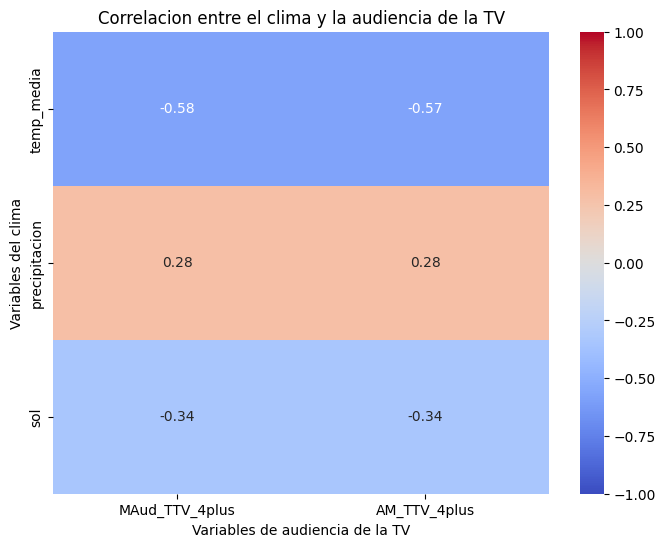

In [74]:
# Select the columns for the weather variables and the TV audience variables
# weather_columns = ['temp_media', 'precipitacion', 'sol']
weather_columns = ['temp_media', 'precipitacion', 'sol']
tv_audience_columns = ['MAud_TTV_4plus', 'AM_TTV_4plus']

# Calculate the correlation between the selected columns
correlation_matrix = df_result[weather_columns + tv_audience_columns].corr()

# Show the correlation between the weather variables and the TV audience variables
correlation_result = correlation_matrix.loc[weather_columns, tv_audience_columns]

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_result, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)

# Set the title and labels
plt.title('Correlacion entre el clima y la audiencia de la TV')
plt.xlabel('Variables de audiencia de la TV')
plt.ylabel('Variables del clima')

# Show the plot
plt.show()

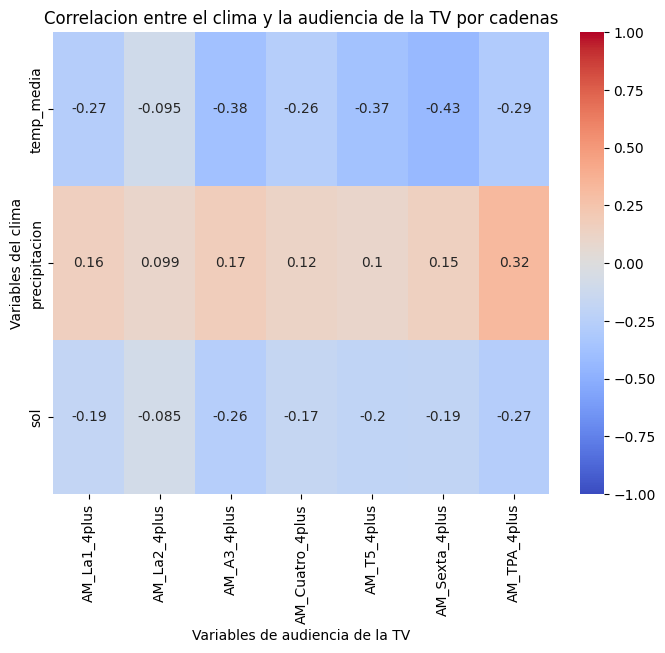

In [75]:
# Select the columns for the weather variables and the TV audience variables
# weather_columns = ['temp_media', 'precipitacion', 'sol']
weather_columns = ['temp_media', 'precipitacion', 'sol']
tv_audience_columns = ['MAud_TTV_4plus', 'AM_TTV_4plus']
tv_audience_columns = [col for col in df_result.columns if col.startswith('AM')  and col.endswith('4plus') and not col.startswith('AM_TTV')]

# Calculate the correlation between the selected columns
correlation_matrix = df_result[weather_columns + tv_audience_columns].corr()

# Show the correlation between the weather variables and the TV audience variables
correlation_result = correlation_matrix.loc[weather_columns, tv_audience_columns]

# Create a heatmap using Seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_result, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)

# Set the title and labels
plt.title('Correlacion entre el clima y la audiencia de la TV por cadenas')
plt.xlabel('Variables de audiencia de la TV')
plt.ylabel('Variables del clima')

# Show the plot
plt.show()

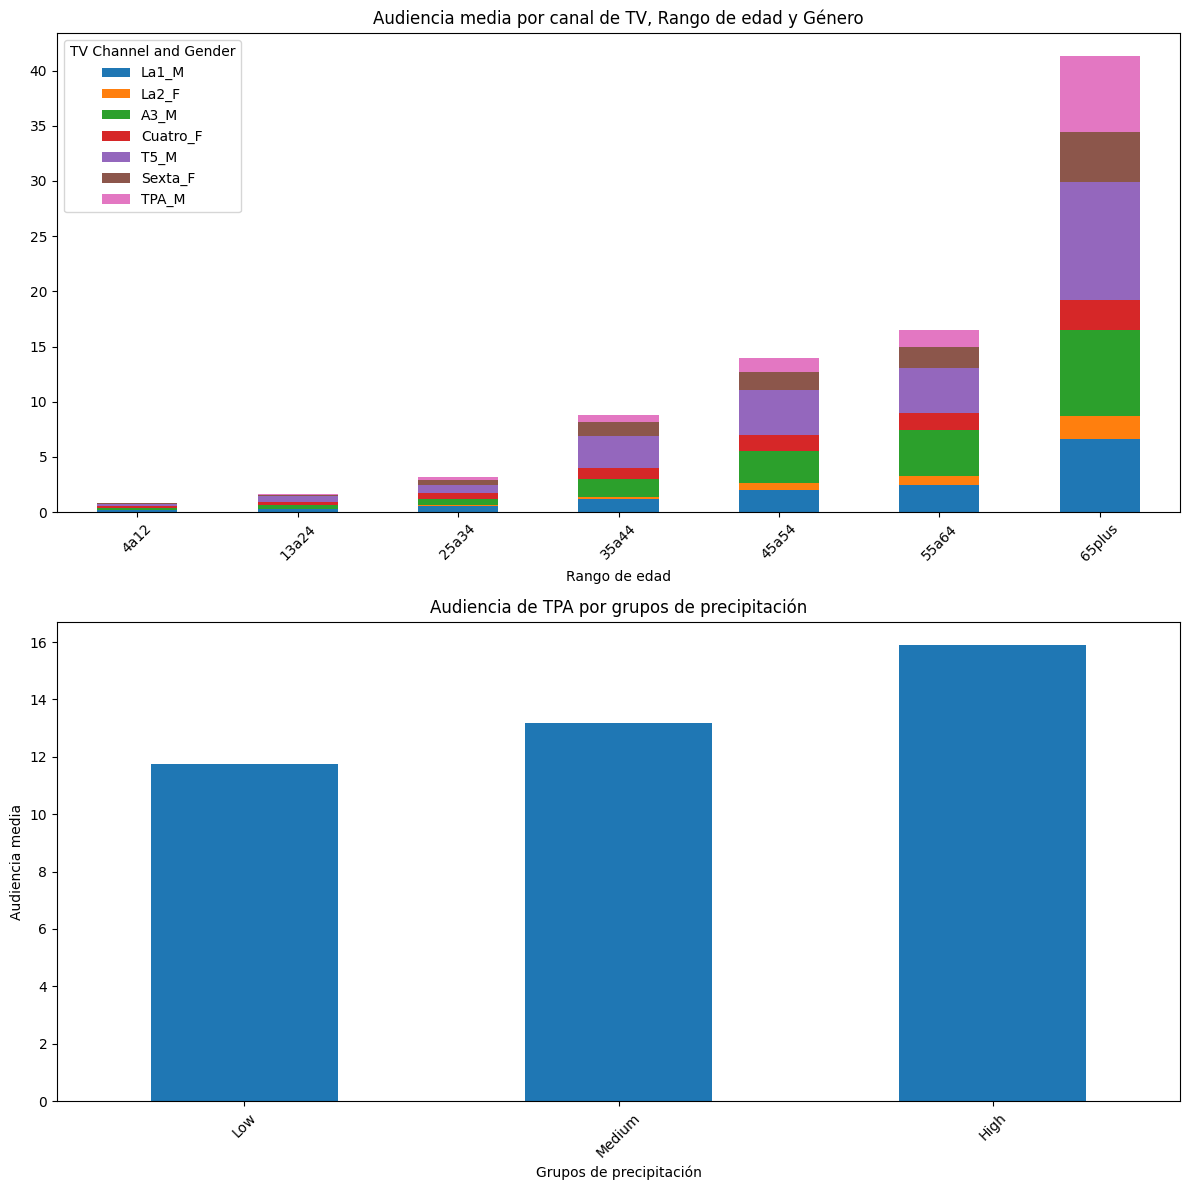

In [84]:
# Replace "Ip" with NaN and convert the "precipitacion" column to numeric
df_result['precipitacion'] = pd.to_numeric(df_result['precipitacion'], errors='coerce')

# List the age ranges
age_ranges = ['4a12', '13a24', '25a34', '35a44', '45a54', '55a64', '65plus']

# Create a new DataFrame to store the average audience by TV channel, age range, and gender
age_gender_df_result = pd.DataFrame(columns=age_ranges)

# Loop through the age ranges and calculate the average audience for each TV channel and gender
for age_range in age_ranges:
    age_columns = [col for col in df_result.columns if col.startswith('AM') and col.endswith(age_range) and not col.startswith('AM_TTV')]
    age_data = df_result[age_columns].mean().rename(lambda x: x[3:-len(age_range)-1], axis='index')
    age_gender_df_result[age_range] = age_data

# Transpose the DataFrame to have the age ranges as rows and TV channels as columns
age_gender_df_result = age_gender_df_result.transpose()

# Add a '_M' or '_F' suffix to the columns to indicate the gender
age_gender_df_result.columns = [f"{col}_M" if idx % 2 == 0 else f"{col}_F" for idx, col in enumerate(age_gender_df_result.columns)]

# Group the weather conditions into bins (e.g., low, medium, high) based on the 'precipitacion' column
bins = [0, 25, 50, float("inf")]
bin_labels = ['Low', 'Medium', 'High']
df_result['precipitation_group'] = pd.cut(df_result['precipitacion'], bins=bins, labels=bin_labels)

# Calculate the average audience for TPA by precipitation group
tpa_audience_by_precipitation = df_result.groupby('precipitation_group')['AM_TPA_4plus'].mean()

# Plot the results
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

age_gender_df_result.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Audiencia media por canal de TV, Rango de edad y Género')
ax1.set_xlabel('Rango de edad')
ax2.set_ylabel('Audiencia media')
ax1.set_xticklabels(age_ranges, rotation=45)
ax1.legend(title='TV Channel and Gender')

tpa_audience_by_precipitation.plot(kind='bar', ax=ax2)
ax2.set_title('Audiencia de TPA por grupos de precipitación')
ax2.set_xlabel('Grupos de precipitación')
ax2.set_ylabel('Audiencia media')
ax2.set_xticklabels(bin_labels, rotation=45)

plt.tight_layout()
plt.show()


In [83]:
print(age_gender_df_result.columns)

Index(['La1_M', 'La2_F', 'A3_M', 'Cuatro_F', 'T5_M', 'Sexta_F', 'TPA_M'], dtype='object')


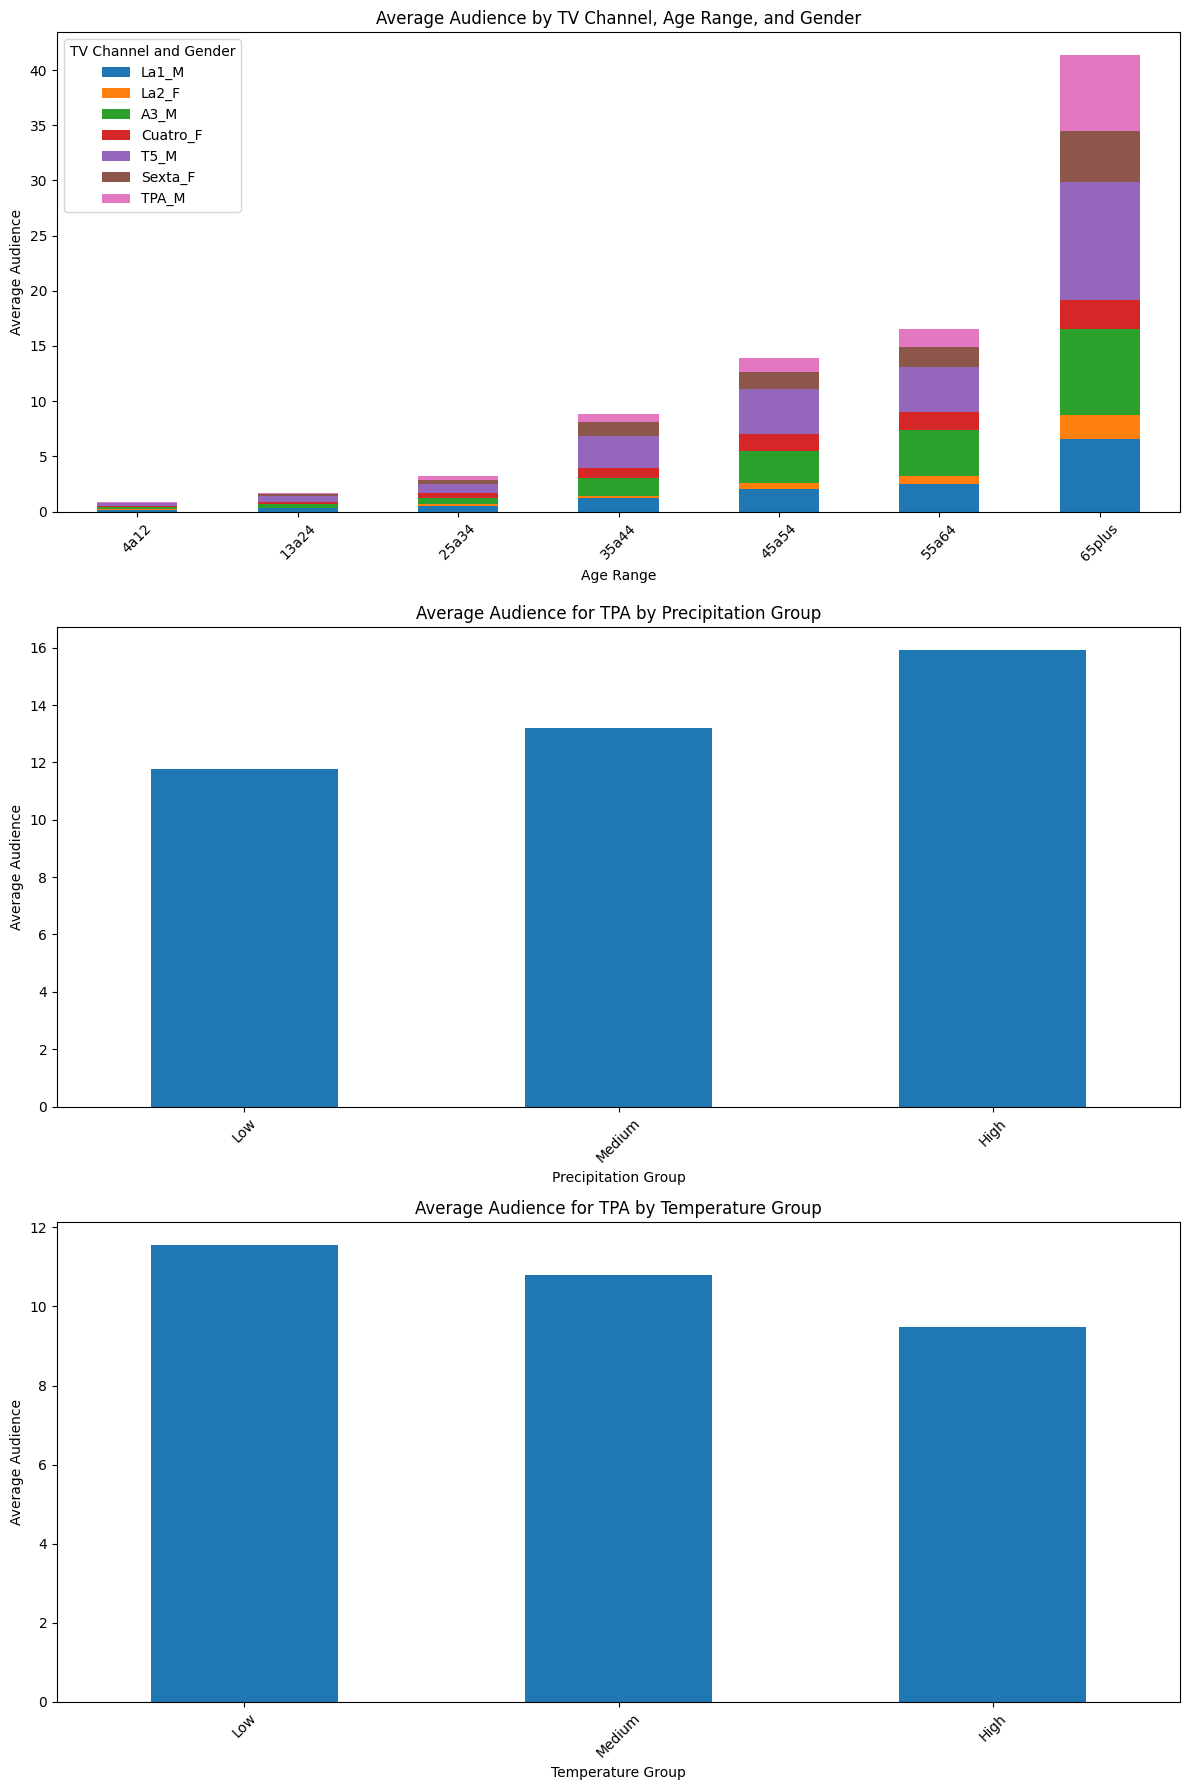

In [85]:
# Group the weather conditions into bins (e.g., low, medium, high) based on the 'temp_media' column
temp_bins = [-float("inf"), 10, 20, float("inf")]
temp_bin_labels = ['Low', 'Medium', 'High']
df_result['temperature_group'] = pd.cut(df_result['temp_media'], bins=temp_bins, labels=temp_bin_labels)

# Calculate the average audience for TPA by temperature group
tpa_audience_by_temperature = df_result.groupby('temperature_group')['AM_TPA_4plus'].mean()

# Plot the results
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 18))

age_gender_df_result.plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('IGNORAR, ESTA ESTA MAL')
ax1.set_xlabel('Age Range')
ax1.set_ylabel('Average Audience')
ax1.set_xticklabels(age_ranges, rotation=45)
ax1.legend(title='TV Channel and Gender')

tpa_audience_by_precipitation.plot(kind='bar', ax=ax2)
ax2.set_title('Average Audience for TPA by Precipitation Group')
ax2.set_xlabel('Precipitation Group')
ax2.set_ylabel('Average Audience')
ax2.set_xticklabels(bin_labels, rotation=45)

tpa_audience_by_temperature.plot(kind='bar', ax=ax3)
ax3.set_title('Average Audience for TPA by Temperature Group')
ax3.set_xlabel('Temperature Group')
ax3.set_ylabel('Average Audience')
ax3.set_xticklabels(temp_bin_labels, rotation=45)

plt.tight_layout()
plt.show()
